Your team decided to design a dashboard to display the statistic of COVID19 cases. You are tasked to display one of the components of the dashboard which is to display a visualisation representation of number of COVID19 cases in Singapore over time.

Your team decided to use the public data from https://documenter.getpostman.com/view/10808728/SzS8rjbc#b07f97ba-24f4-4ebe-ad71-97fa35f3b683.

Display a graph to show the number cases in Singapore over time using the APIs from https://covid19api.com/.

In [1]:
import requests

### Check if singapore exist

In [2]:
r = requests.get("https://api.covid19api.com/countries")

In [3]:
r_json = r.json()

In [4]:
[i for i in r_json if i["Country"] == "Singapore"]

[{'Country': 'Singapore', 'Slug': 'singapore', 'ISO2': 'SG'}]

### Get all covid cases from Singapore

In [5]:
r = requests.get(
        "https://api.covid19api.com/country/Singapore/status/confirmed"
)

In [6]:
covid_cases_lst = r.json()

### Plot a graph to show number of cases in Singapore overtime 

In [7]:
import pandas as pd

In [8]:
covid_cases_df = pd.DataFrame(covid_cases_lst)

In [9]:
covid_cases_df["Status"].value_counts() 

confirmed    403
Name: Status, dtype: int64

include only confirmed cases 

In [10]:
from dateutil import parser

In [11]:
covid_cases_df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Singapore,SG,,,,1.35,103.82,0,confirmed,2020-01-22T00:00:00Z
1,Singapore,SG,,,,1.35,103.82,1,confirmed,2020-01-23T00:00:00Z
2,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-24T00:00:00Z
3,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-25T00:00:00Z
4,Singapore,SG,,,,1.35,103.82,4,confirmed,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...
398,Singapore,SG,,,,1.35,103.82,59883,confirmed,2021-02-23T00:00:00Z
399,Singapore,SG,,,,1.35,103.82,59890,confirmed,2021-02-24T00:00:00Z
400,Singapore,SG,,,,1.35,103.82,59900,confirmed,2021-02-25T00:00:00Z
401,Singapore,SG,,,,1.35,103.82,59913,confirmed,2021-02-26T00:00:00Z


In [12]:
def get_timestamp_tz(timestamp_str):
    """
    given timestamp in string, convert it back to datetime given format
    """
    timestamp = parser.parse(timestamp_str)
    return timestamp

In [13]:
covid_cases_df["Date"] = covid_cases_df["Date"].apply(lambda x: get_timestamp_tz(x) )

In [14]:
covid_cases_df["Date"].apply(lambda x: x.month)

0      1
1      1
2      1
3      1
4      1
      ..
398    2
399    2
400    2
401    2
402    2
Name: Date, Length: 403, dtype: int64

<AxesSubplot:xlabel='Date'>

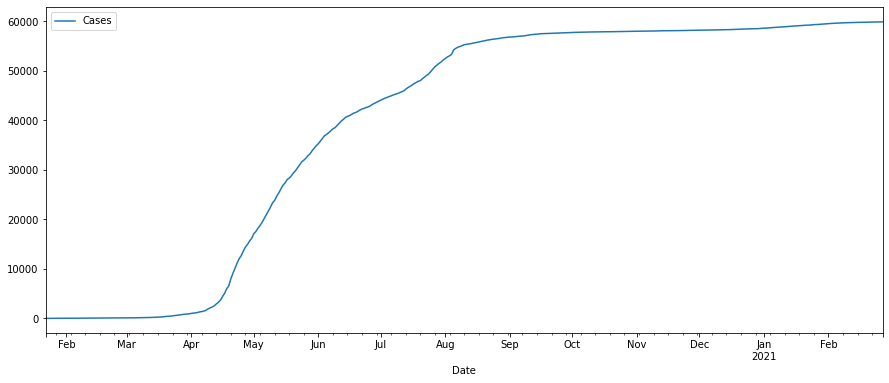

In [15]:
covid_cases_df.plot(x="Date", y="Cases", figsize=(15,6))

Rising trend observed in the number of covid cases, where the sharp increase in the number of covid cases happened around May 2020